Key concepts:  
    Tokenize  
    Vectorize  
    Stopwords  
    Visualize using wordcloud

### Importing modules and setting up configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import nltk

# https://www.kaggle.com/futurist/text-preprocessing-and-machine-learning-modeling

### Loading data

In [2]:
data = pd.read_csv("spam.csv", encoding='latin-1')

### Exploratory data analysis

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
len(data)

5572

In [5]:
#Subset the data and name change
mydata = data[['v1', 'v2']]
mydata = mydata.rename(columns = {"v1":"label", "v2":"text"})
mydata.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mydata.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

### Tokenizing the first message

In [37]:
# https://www.nltk.org/api/nltk.tokenize.html
tokens = nltk.word_tokenize('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
print str(tokens)

['Go', 'until', 'jurong', 'point', ',', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


### Vectorizing the first two messages 

In [7]:
corpus = [
    'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
    'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C s apply 08452810075over18 s',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

[u'08452810075over18', u'2005', u'21st', u'87121', u'amore', u'apply', u'available', u'buffet', u'bugis', u'cine', u'comp', u'crazy', u'cup', u'entry', u'fa', u'final', u'free', u'go', u'got', u'great', u'in', u'jurong', u'la', u'may', u'only', u'point', u'question', u'rate', u'receive', u'std', u'text', u'there', u'tkts', u'to', u'txt', u'until', u'wat', u'win', u'wkly', u'world']
[[0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1
  1 0 0 1]
 [1 1 1 1 0 1 0 0 0 0 1 0 1 2 2 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 3 1 0
  0 1 1 0]]


In [8]:
print len(vectorizer.get_feature_names())
print len(X.toarray()[0])

40
40


In [9]:
# ham
print mydata['text'].iloc[0]

#spam
print mydata['text'].iloc[1]

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...


In [10]:
# The vocabulary for the first two text messages. The keys are the words 
# and the values are the IDs given to each word.
vectorizer.vocabulary_

{u'08452810075over18': 0,
 u'2005': 1,
 u'21st': 2,
 u'87121': 3,
 u'amore': 4,
 u'apply': 5,
 u'available': 6,
 u'buffet': 7,
 u'bugis': 8,
 u'cine': 9,
 u'comp': 10,
 u'crazy': 11,
 u'cup': 12,
 u'entry': 13,
 u'fa': 14,
 u'final': 15,
 u'free': 16,
 u'go': 17,
 u'got': 18,
 u'great': 19,
 u'in': 20,
 u'jurong': 21,
 u'la': 22,
 u'may': 23,
 u'only': 24,
 u'point': 25,
 u'question': 26,
 u'rate': 27,
 u'receive': 28,
 u'std': 29,
 u'text': 30,
 u'there': 31,
 u'tkts': 32,
 u'to': 33,
 u'txt': 34,
 u'until': 35,
 u'wat': 36,
 u'win': 37,
 u'wkly': 38,
 u'world': 39}

### Vectorizing all text messages with sklearn using stopword from NLTK 

In [11]:
ham_words = ''
spam_words = ''
spam = mydata[mydata.label == 'spam']
ham = mydata[mydata.label == 'ham']

In [12]:
from nltk import word_tokenize
from collections import Counter
from nltk.corpus import stopwords 
from string import punctuation

stopwords_nltk_en = set(stopwords.words('english')) 
stopwords_punct = set(punctuation)
stoplist_combined = set.union(stopwords_nltk_en, stopwords_punct)

vect = CountVectorizer(tokenizer = word_tokenize, stop_words = stoplist_combined)

X = vect.fit_transform(spam.text)

# Vocabulary
vocab = list(vect.get_feature_names())

counts = X.sum(axis = 0).A1

freq_distribution = Counter(dict(zip(vocab, counts)))
print(freq_distribution.most_common(30))

#https://stackoverflow.com/questions/35857519/efficiently-count-word-frequencies-in-python/35857833

[(u'call', 346), (u'free', 217), (u'2', 174), (u'txt', 156), (u'ur', 144), (u'u', 141), (u'mobile', 123), (u'text', 121), (u'stop', 114), (u'claim', 113), (u'reply', 104), (u'4', 95), (u'prize', 92), (u'get', 84), (u"'s", 72), (u'new', 69), (u'send', 68), (u'nokia', 65), (u'cash', 62), (u'urgent', 62), (u'win', 60), (u'contact', 56), (u'service', 55), (u'week', 53), (u'please', 53), (u'c', 51), (u'guaranteed', 50), (u'customer', 49), (u'tone', 48), (u'phone', 45)]


### Visualize the text data (the frequency of each word is shown with font size)

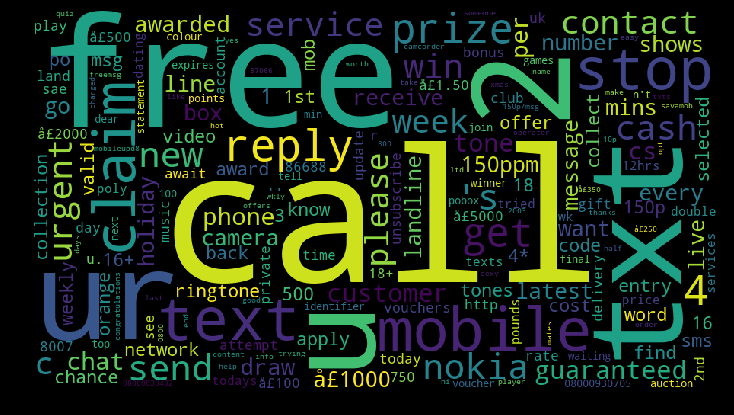

In [13]:
a = dict(zip(vocab, counts))

twotexts = WordCloud(width = 900, height = 500).generate_from_frequencies(a)

#Spam Word cloud
plt.figure(figsize = (10,8), facecolor='k')
plt.imshow(twotexts)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Create a collection of words using word_tokenize from NLTK 

In [14]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [15]:
spam_words

u"free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question ( std txt rate ) t & c 's apply 08452810075over18 's freemsg hey there darling it 's been 3 week 's now and no word back ! i 'd like some fun you up for it still ? tb ok ! xxx std chgs to send , \xe5\xa31.50 to rcv winner ! ! as a valued network customer you have been selected to receivea \xe5\xa3900 prize reward ! to claim call 09061701461. claim code kl341 . valid 12 hours only . had your mobile 11 months or more ? u r entitled to update to the latest colour mobiles with camera for free ! call the mobile update co free on 08002986030 six chances to win cash ! from 100 to 20,000 pounds txt > csh11 and send to 87575. cost 150p/day , 6days , 16+ tsandcs apply reply hl 4 info urgent ! you have won a 1 week free membership in our \xe5\xa3100,000 prize jackpot ! txt the word : claim to no : 81010 t & c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub : to use your cr

### Visualize the collection of text data 

In [16]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)

for w in sorted(spam_wordcloud.words_, key = spam_wordcloud.words_.get, reverse=True):
  print w, spam_wordcloud.words_[w]

# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

free 1.0
text 0.696202531646
call 0.588607594937
now 0.5
txt 0.493670886076
mobile 0.493670886076
call now 0.379746835443
reply 0.341772151899
stop 0.310126582278
co uk 0.310126582278
150p 0.303797468354
new 0.29746835443
please call 0.291139240506
tone 0.26582278481
message 0.26582278481
win 0.227848101266
send 0.183544303797
will 0.177215189873
chat 0.177215189873
ringtone 0.177215189873
customer service 0.170886075949
poly 0.170886075949
msg 0.158227848101
claim 0.158227848101
po box 0.151898734177
orange 0.145569620253
guaranteed call 0.145569620253
go 0.139240506329
day 0.139240506329
urgent 0.139240506329
prize guaranteed 0.139240506329
call landline 0.139240506329
collect 0.126582278481
national rate 0.126582278481
every week 0.120253164557
send stop 0.120253164557
club 0.120253164557
phone 0.120253164557
await collection 0.120253164557
selected receive 0.120253164557
call land 0.113924050633
land line 0.113924050633
game 0.113924050633
sms 0.113924050633
won prize 0.11392405063

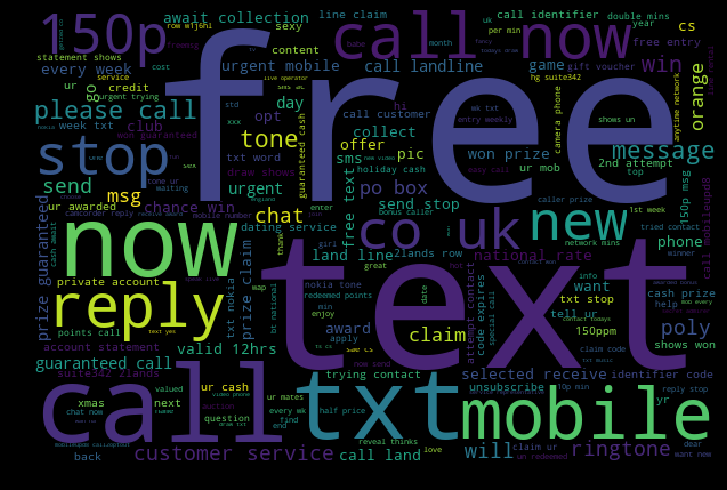

In [17]:
#Spam Word cloud
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [18]:
ham_wordcloud = WordCloud(width = 600, height = 400).generate(ham_words)

for w in sorted(ham_wordcloud.words_, key = ham_wordcloud.words_.get, reverse = True):
  print w, ham_wordcloud.words_[w]

# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

will 1.0
lt gt 0.884615384615
ok 0.833333333333
now 0.810897435897
got 0.708333333333
go 0.701923076923
n't 0.685897435897
love 0.63141025641
time 0.63141025641
ur 0.592948717949
come 0.564102564103
need 0.554487179487
one 0.544871794872
day 0.538461538462
going 0.503205128205
want 0.483974358974
still 0.480769230769
ll 0.480769230769
know 0.480769230769
good 0.474358974359
da 0.455128205128
home 0.448717948718
today 0.419871794872
call 0.413461538462
lor 0.403846153846
tell 0.400641025641
see 0.384615384615
think 0.384615384615
back 0.38141025641
sorry 0.378205128205
dont 0.371794871795
oh 0.362179487179
thing 0.362179487179
ì_ 0.362179487179
much 0.358974358974
say 0.358974358974
hey 0.342948717949
work 0.330128205128
make 0.330128205128
well 0.326923076923
way 0.310897435897
take 0.307692307692
dear 0.291666666667
ask 0.291666666667
send 0.288461538462
thank 0.285256410256
hope 0.285256410256
wat 0.285256410256
give 0.282051282051
re 0.275641025641
really 0.272435897436
already 0.26

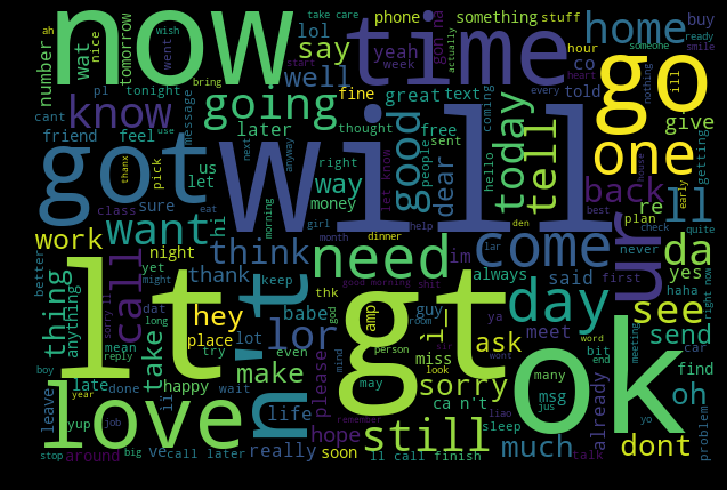

In [19]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Split the text data for building the model

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mydata["text"], mydata["label"], \
                                                 test_size = 0.2, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


### Vectorization, training and testing the model

In [31]:
# If encoding='latin-1' is missing, an error would appear
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
vect = CountVectorizer(tokenizer = word_tokenize, stop_words = stoplist_combined)
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

prediction = dict()

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

print accuracy_score(y_test, model.predict(X_test_df))

0.9847533632286996


In [32]:
print classification_report(y_test,model.predict(X_test_df))

             precision    recall  f1-score   support

        ham       0.99      0.99      0.99       965
       spam       0.95      0.93      0.94       150

avg / total       0.98      0.98      0.98      1115



In [34]:
# 12/3 may continue with the prediction presented in 
# https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
# Or this may be sufficient